<a href="https://colab.research.google.com/github/MuhammadBasilKhan/potato-leaves-desiases/blob/main/potatos_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:

imagesize=256
Batchsize=32
CHANNELS=3
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/potatos diseases/PLD_3_Classes_256/Training",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 3251 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [6]:
len(dataset)

102

In [7]:
dataset1=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/potatos diseases/PLD_3_Classes_256/Testing",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 405 files belonging to 3 classes.


In [8]:
class_names=dataset1.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [9]:
len(dataset1)

13

In [10]:
dataset2=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/drive/potatos diseases/PLD_3_Classes_256/Validation",
                                                    shuffle=True,
                                                    image_size=(imagesize,imagesize),
                                                    batch_size=Batchsize)


Found 416 files belonging to 3 classes.


In [11]:
class_names=dataset2.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [12]:
len(dataset2)

13

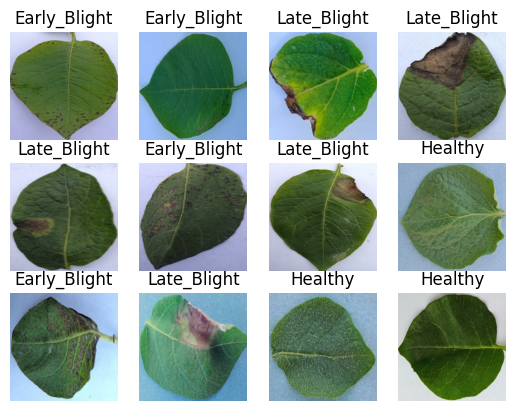

In [13]:
for image_batch, label_batch in dataset.take(1):
  #print(image_batch.shape)
  #print(label_batch.numpy())
  #print(image_batch[0].numpy())
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [14]:
val_ds=dataset2
test_ds=dataset1
train_ds=dataset

In [15]:
print(len(val_ds))
print(len(test_ds))
print(len(train_ds))


13
13
102


In [16]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [17]:

train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)


In [18]:
len(train_ds)


81

In [19]:

len(val_ds)

10

In [20]:

len(test_ds)

11

In [21]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale=tf.keras.Sequential([
                    layers.experimental.preprocessing.Resizing(imagesize,imagesize),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [23]:

data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [24]:
input_shape=(Batchsize,imagesize,imagesize,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])


In [25]:
model.build(input_shape=input_shape)


In [26]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [28]:
history=model.fit(train_ds,
                  epochs=EPOCHS,
                  batch_size=Batchsize,verbose=1,
                  validation_data=val_ds)

Epoch 1/50
81/81 [==============================] - 130s 314ms/step - loss: 0.9899 - accuracy: 0.4996 - val_loss: 0.8781 - val_accuracy: 0.6812
Epoch 2/50
81/81 [==============================] - 5s 61ms/step - loss: 0.7700 - accuracy: 0.6937 - val_loss: 0.7040 - val_accuracy: 0.6938
Epoch 3/50
81/81 [==============================] - 5s 63ms/step - loss: 0.5328 - accuracy: 0.7998 - val_loss: 0.4221 - val_accuracy: 0.8531
Epoch 4/50
81/81 [==============================] - 5s 61ms/step - loss: 0.3985 - accuracy: 0.8519 - val_loss: 0.3657 - val_accuracy: 0.8750
Epoch 5/50
81/81 [==============================] - 5s 62ms/step - loss: 0.3496 - accuracy: 0.8727 - val_loss: 0.4306 - val_accuracy: 0.8000
Epoch 6/50
81/81 [==============================] - 5s 64ms/step - loss: 0.3067 - accuracy: 0.8846 - val_loss: 0.1614 - val_accuracy: 0.9281
Epoch 7/50
81/81 [==============================] - 5s 62ms/step - loss: 0.2739 - accuracy: 0.9032 - val_loss: 0.1900 - val_accuracy: 0.9250
Epoch 8/50

In [29]:

model.evaluate(test_ds)


11/11 [==============================] - 12s 98ms/step - loss: 0.0528 - accuracy: 0.9882


[0.05275346711277962, 0.9882006049156189]

In [30]:
history

In [31]:

history.params

{'verbose': 1, 'epochs': 50, 'steps': 81}

In [32]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
type(history.history['loss'])

list

In [34]:
len(history.history['loss'])

50

In [35]:
history.history['loss'][:5]

[0.9899303317070007,
 0.7699611783027649,
 0.5327869653701782,
 0.39852645993232727,
 0.34959596395492554]

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

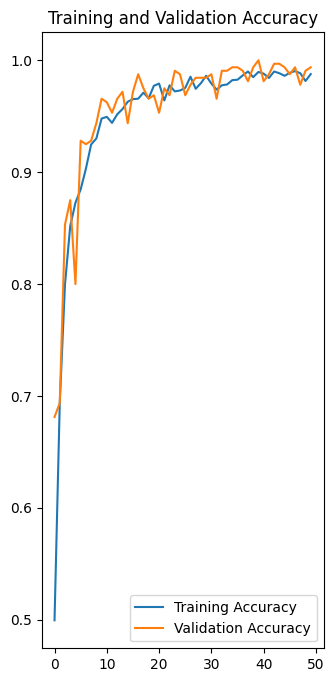

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


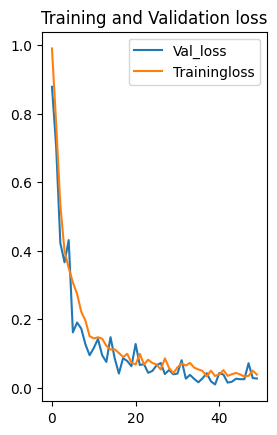

In [39]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),val_loss , label='Val_loss')
plt.plot(range(EPOCHS),loss,label='Trainingloss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

[[[175  83 170]
  [181  89 176]
  [184  92 179]
  ...
  [211 135 207]
  [214 138 210]
  [213 137 209]]

 [[180  88 175]
  [185  93 180]
  [186  94 181]
  ...
  [213 137 209]
  [212 136 208]
  [206 130 202]]

 [[183  91 178]
  [186  94 181]
  [186  94 181]
  ...
  [211 135 207]
  [206 130 202]
  [196 120 192]]

 ...

 [[171  79 166]
  [174  82 169]
  [175  83 170]
  ...
  [201 119 201]
  [199 117 199]
  [211 129 211]]

 [[173  81 168]
  [178  86 173]
  [179  87 174]
  ...
  [198 116 198]
  [197 115 197]
  [211 129 211]]

 [[176  84 171]
  [182  90 177]
  [182  90 177]
  ...
  [190 108 190]
  [191 109 191]
  [208 126 208]]]
first image to predict
actual label: Healthy
1/1 [==============================] - 0s 39ms/step
1
predicted label: Healthy


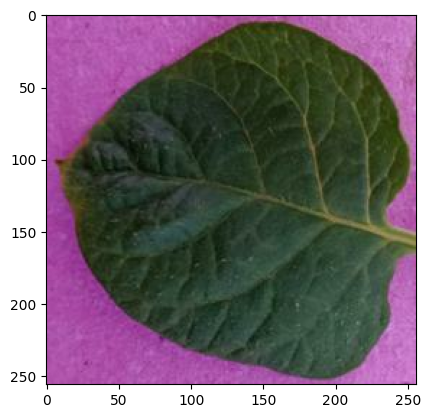

In [41]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))
  print(images_batch[0].numpy().astype('uint8'))
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])
  batch_prediction=model.predict(images_batch)
  print(np.argmax(batch_prediction[0]))
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 19ms/step


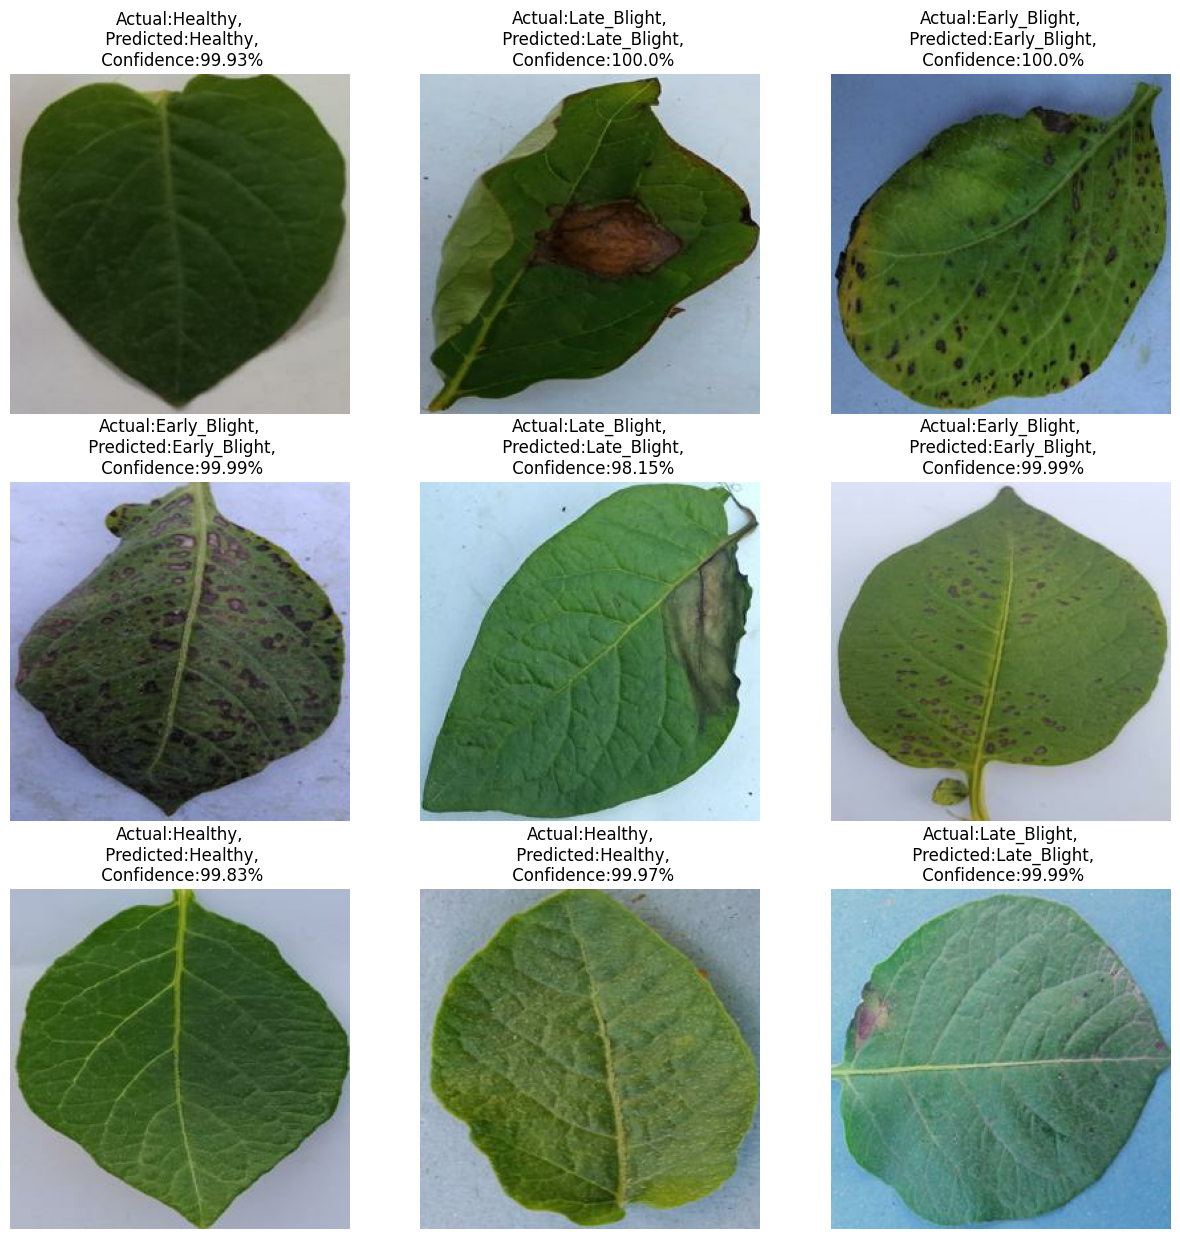

In [43]:

plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    axis=plt.subplot(3,3,i+1)

    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}%")
    plt.axis("off")

In [ ]:
model.save('/content/drive/MyDrive/your_model.h5')
